In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Get the training and test dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Check the number of rows and columns in the training dataset

df_train.shape

(1460, 81)

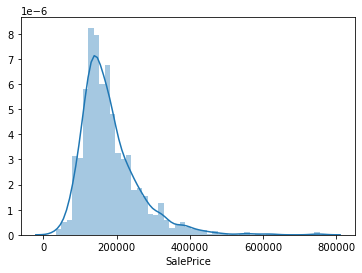

In [4]:
# Checking how the SalePrice varies in our dataset

df_train['SalePrice'].describe()

sns.distplot(df_train['SalePrice']);

In [5]:
# Taking a look at the Features(Columns) of the dataset

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Referrence for Data Exploration Techniques https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

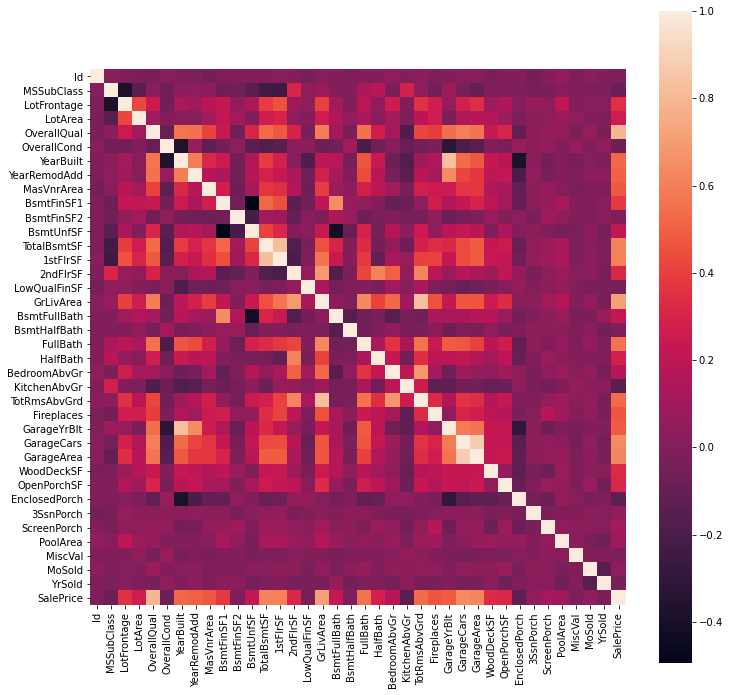

In [6]:
# Correlation Matrix to see how the features affect each other

correlation_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_matrix, square=True);

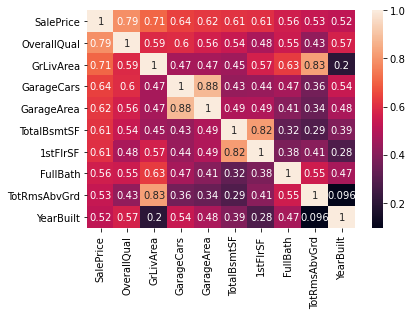

In [7]:
# The most correlated features with SalePrice

k = 10
cols = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

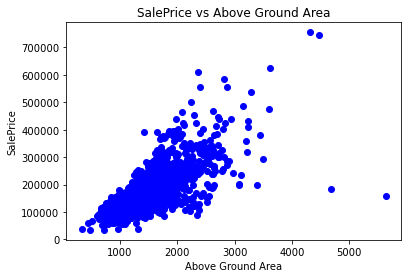

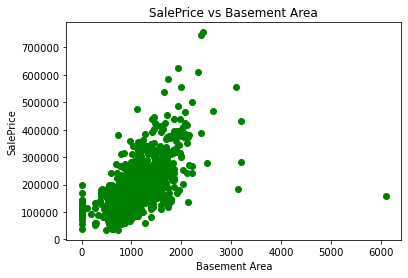

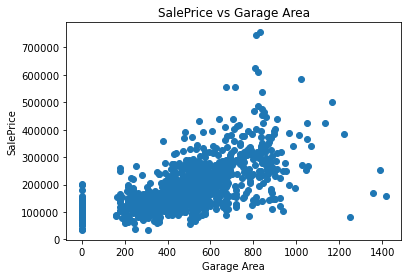

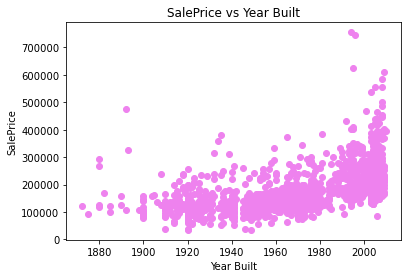

In [8]:
# Comparing how few of the correlated features affect the saleprice

x= df_train['GrLivArea']
y= df_train['SalePrice']
plt.scatter(x , y , color='blue')
plt.title('SalePrice vs Above Ground Area')
plt.ylabel('SalePrice')
plt.xlabel('Above Ground Area')
plt.show()

x= df_train['TotalBsmtSF']
plt.scatter(x , y , color='green')
plt.title('SalePrice vs Basement Area')
plt.ylabel('SalePrice')
plt.xlabel('Basement Area')
plt.show()

x= df_train['GarageArea']
plt.scatter(x , y )
plt.title('SalePrice vs Garage Area')
plt.ylabel('SalePrice')
plt.xlabel('Garage Area')
plt.show()

x= df_train['YearBuilt']
plt.scatter(x , y , color='violet')
plt.title('SalePrice vs Year Built')
plt.ylabel('SalePrice')
plt.xlabel('Year Built')
plt.show()

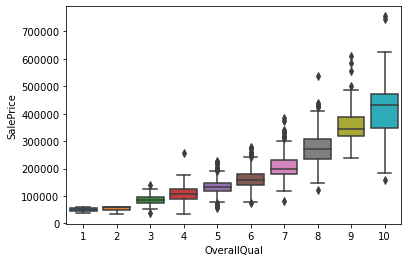

In [9]:
# Comparing SalePrice with Overall Quality of House

sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])

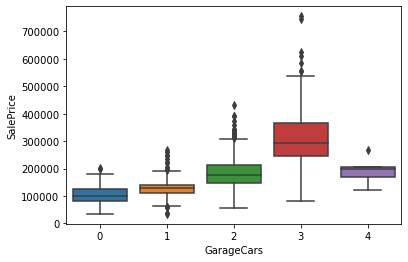

In [10]:
# Comparing SalePrice with Number of Cars in Garage

sns.boxplot(x=df_train['GarageCars'], y=df_train['SalePrice'])

In [11]:
data = pd.concat([df_train, df_test],axis=0)
data.shape

(2919, 81)

In [12]:
data.drop(['SalePrice', 'Id'],axis=1, inplace=True)

In [13]:
# Calculate percentage of missing data in each feature

percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
percent.head(10)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
dtype: float64

In [14]:
# Drop the features with more than 10% Missing Data

data = data.drop((percent[percent > 10]).index,1)

data.shape

(2919, 73)

In [15]:
# Get all the columns with Missing data in the combined dataset

data.columns[data.isnull().any()]


Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [16]:
data.drop(['BsmtQual', 'BsmtFinType1','BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtExposure',
           'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond'],axis=1, inplace=True)

In [17]:
data.columns[data.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtCond', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType'],
      dtype='object')

In [18]:
Null_data = data[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtCond', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType']]

In [19]:
Null_cat_data = Null_data.select_dtypes(include='object')
Null_num_data = Null_data.select_dtypes(exclude='object')

print(Null_cat_data.columns)
print(Null_num_data.columns)

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtCond', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')
Index(['MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars'],
      dtype='object')


In [20]:
Null_cat_data.head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtCond,Electrical,KitchenQual,Functional,SaleType
0,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,SBrkr,Gd,Typ,WD
1,RL,AllPub,MetalSd,MetalSd,None,TA,SBrkr,TA,Typ,WD
2,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,SBrkr,Gd,Typ,WD
3,RL,AllPub,Wd Sdng,Wd Shng,None,Gd,SBrkr,Gd,Typ,WD
4,RL,AllPub,VinylSd,VinylSd,BrkFace,TA,SBrkr,Gd,Typ,WD


In [21]:
# Handling Missing Categorical Values

data['MSZoning'] = data['MSZoning'].fillna(method='ffill')
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['BsmtCond'] = data['BsmtCond'].fillna("None")



In [22]:
Null_num_data.head()

,MasVnrArea,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars
0,196.0,856.0,1.0,0.0,2.0
1,0.0,1262.0,0.0,1.0,2.0
2,162.0,920.0,1.0,0.0,2.0
3,0.0,756.0,1.0,0.0,3.0
4,350.0,1145.0,1.0,0.0,3.0


In [23]:
# Handling Missing Numerical Values

data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
data['GarageCars'] = data['GarageCars'].fillna(0)

In [24]:
# Confirm all missing data is handled

data.isnull().sum().sort_values(ascending=False).head(10)

SaleCondition    0
SaleType         0
BsmtCond         0
Foundation       0
ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
dtype: int64

In [25]:
X = data

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)


ohe = OneHotEncoder()
X= ohe.fit_transform(X).toarray()

### Training, Validation and Test Data Split

In [27]:
X_train = X[:1300,:]
Y_train = df_train.iloc[:1300, -1]
X_val = X[1300:1460,:]
Y_val = df_train.iloc[1300:1460, -1]

X_test = X[1460: , :]

In [28]:
print(X_train.shape)
print(Y_train.shape)

(1300, 7996)
(1300,)


### Model - Random Forest 100 estimators

In [29]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators = 100)
classifier.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
# y_train_pred is our prediction on training dataset and y_pred is our prediction on validation dataset 
y_pred = classifier.predict(X_val)
y_train_pred = classifier.predict(X_train)

Text(0.5, 1.0, 'SalePrice Comparision on Training Data')

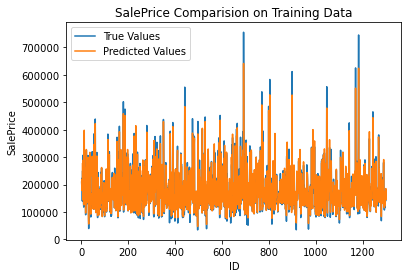

In [31]:
plt.plot(df_train.iloc[0:1300,0],Y_train, label='True Values')
plt.plot(df_train.iloc[0:1300,0],y_train_pred, label='Predicted Values')
plt.xlabel('ID')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice Comparision on Training Data')

Text(0.5, 1.0, 'SalePrice Comparision on Validation Data')

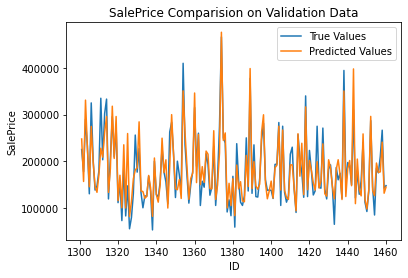

In [32]:
plt.plot(df_train.iloc[1300:1460,0],Y_val, label='True Values')
plt.plot(df_train.iloc[1300:1460,0],y_pred, label='Predicted Values')
plt.xlabel('ID')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice Comparision on Validation Data')

### Model - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression( max_iter=1000)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'SalePrice Comparision on Training Data')

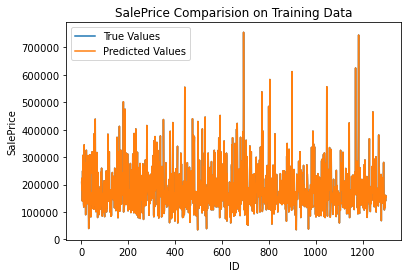

In [35]:
y_lr_train_pred = LR.predict(X_train)
plt.plot(df_train.iloc[0:1300,0],Y_train, label='True Values')
plt.plot(df_train.iloc[0:1300,0],y_lr_train_pred, label='Predicted Values')
plt.xlabel('ID')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice Comparision on Training Data')

Text(0.5, 1.0, 'SalePrice Comparision on Validation Data')

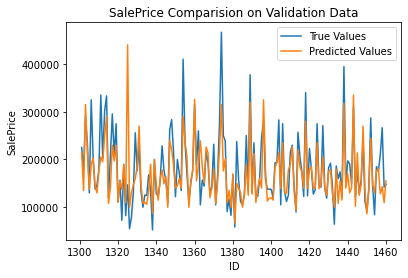

In [36]:
y_lr_pred = LR.predict(X_val)
plt.plot(df_train.iloc[1300:1460,0],Y_val, label='True Values')
plt.plot(df_train.iloc[1300:1460,0],y_lr_pred, label='Predicted Values')
plt.xlabel('ID')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice Comparision on Validation Data')

### Test set Prediction on Best Model

In [37]:
y_test = classifier.predict(X_test)

In [39]:
for i in y_test:
    print(i,end=',')


115272.6,152245.0,176061.32,188980.82,202926.4,177412.0,173363.85,177623.0,168600.3,125327.59,209117.2,100967.71,99361.25,161718.53,131141.58,417806.71,266546.75,337816.52,282531.12,410198.41,307744.43,213496.55,188258.38,196513.27,198004.2,207712.55,316201.99,253513.39,212433.59,194402.37,203883.52,87686.5,178965.37,306860.5,311808.5,210500.95,157386.65,160308.32,153185.0,168650.37,175774.84,162711.32,305185.72,243299.48,206589.44,163338.19,214824.13,166401.71,154588.5,145501.37,143862.0,174600.0,158617.72,130609.82,189510.5,153127.19,144430.16,140834.62,213723.22,135546.0,131706.0,162303.0,117856.74,126233.5,125040.16,121523.98,106891.15,134658.5,142971.5,160568.47,137675.75,104305.0,131437.68,114154.81,135660.5,108348.89,123149.93,194890.18,234967.43,118016.72,130282.0,117547.85,148046.62,85579.61,106680.28,144164.0,135514.0,115098.29,121041.62,154528.96,110536.0,137540.82,124531.94,126480.64,160704.64,106465.0,95111.5,101720.92,96446.67,165532.29,135279.65,130219.08,132144.5,143941

155339.93,142074.0,145387.55,156950.92,396437.39,276040.28,258804.08,374219.92,381589.17,291324.65,260769.68,287549.9,336329.41,353187.69,356528.09,304718.3,296807.48,373117.44,290524.53,171825.66,189927.6,178387.57,285277.97,193614.93,191506.05,200543.5,203969.4,182458.2,191361.22,181564.75,270428.72,319989.5,307640.43,399757.52,300550.41,455935.13,317006.83,313219.83,244660.38,309717.42,211655.54,215989.0,422919.19,186328.15,138115.37,195764.33,143664.62,203783.14,198884.05,189310.7,184599.95,178761.0,174283.55,188792.9,136559.8,120760.3,151056.43,122841.49,124409.16,141576.5,132199.2,116595.04,139376.0,276443.9,300914.61,192882.42,153216.4,172435.98,161028.32,211975.76,235371.07,153799.65,168485.5,140357.53,164632.5,170206.07,135381.12,133399.87,133963.5,177766.5,165298.5,157141.87,137518.5,124757.3,133547.58,148634.7,146134.6,131580.37,150877.37,123536.24,139709.67,155474.2,134369.08,147303.5,161326.0,147886.1,143922.75,140984.59,128944.08,160188.5,134760.84,139910.5,137808.11,1319